<a href="https://colab.research.google.com/github/yjaeseok/Tensorflow_study/blob/master/colab/week4/overfit_and_underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  # 0으로 채워진 (len(sequences), dimension))
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0 # result[i]의 특정 인덱스만 1로 설정합니다.
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

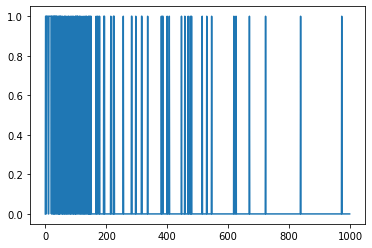

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
  # `.summary` 메서드 때문에 `input_shape`가 필요합니다.
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.5813 - accuracy: 0.7013 - binary_crossentropy: 0.5813 - val_loss: 0.4445 - val_accuracy: 0.8146 - val_binary_crossentropy: 0.4445
Epoch 2/20
49/49 - 0s - loss: 0.3795 - accuracy: 0.8440 - binary_crossentropy: 0.3795 - val_loss: 0.3527 - val_accuracy: 0.8525 - val_binary_crossentropy: 0.3527
Epoch 3/20
49/49 - 0s - loss: 0.3257 - accuracy: 0.8655 - binary_crossentropy: 0.3257 - val_loss: 0.3354 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3354
Epoch 4/20
49/49 - 0s - loss: 0.3088 - accuracy: 0.8721 - binary_crossentropy: 0.3088 - val_loss: 0.3388 - val_accuracy: 0.8562 - val_binary_crossentropy: 0.3388
Epoch 5/20
49/49 - 0s - loss: 0.3031 - accuracy: 0.8741 - binary_crossentropy: 0.3031 - val_loss: 0.3386 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3386
Epoch 6/20
49/49 - 0s - loss: 0.2980 - accuracy: 0.8768 - binary_crossentropy: 0.2980 - val_loss: 0.3297 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3297
Epoch 7/20
49/49 - 0s - loss

In [6]:
smaller_model = keras.Sequential([
  keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS, )),
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6133 - accuracy: 0.6660 - binary_crossentropy: 0.6133 - val_loss: 0.5050 - val_accuracy: 0.7763 - val_binary_crossentropy: 0.5050
Epoch 2/20
49/49 - 0s - loss: 0.4281 - accuracy: 0.8233 - binary_crossentropy: 0.4281 - val_loss: 0.3837 - val_accuracy: 0.8438 - val_binary_crossentropy: 0.3837
Epoch 3/20
49/49 - 0s - loss: 0.3525 - accuracy: 0.8565 - binary_crossentropy: 0.3525 - val_loss: 0.3511 - val_accuracy: 0.8538 - val_binary_crossentropy: 0.3511
Epoch 4/20
49/49 - 0s - loss: 0.3255 - accuracy: 0.8677 - binary_crossentropy: 0.3255 - val_loss: 0.3364 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3364
Epoch 5/20
49/49 - 0s - loss: 0.3141 - accuracy: 0.8713 - binary_crossentropy: 0.3141 - val_loss: 0.3319 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3319
Epoch 6/20
49/49 - 0s - loss: 0.3081 - accuracy: 0.8743 - binary_crossentropy: 0.3081 - val_loss: 0.3295 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3295
Epoch 7/20
49/49 - 0s - loss

In [8]:
bigger_model = keras.models.Sequential([
  keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4136 - accuracy: 0.8107 - binary_crossentropy: 0.4136 - val_loss: 0.3311 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3311
Epoch 2/20
49/49 - 3s - loss: 0.2912 - accuracy: 0.8785 - binary_crossentropy: 0.2912 - val_loss: 0.3225 - val_accuracy: 0.8621 - val_binary_crossentropy: 0.3225
Epoch 3/20
49/49 - 2s - loss: 0.2239 - accuracy: 0.9119 - binary_crossentropy: 0.2239 - val_loss: 0.3391 - val_accuracy: 0.8563 - val_binary_crossentropy: 0.3391
Epoch 4/20
49/49 - 2s - loss: 0.1096 - accuracy: 0.9642 - binary_crossentropy: 0.1096 - val_loss: 0.4195 - val_accuracy: 0.8472 - val_binary_crossentropy: 0.4195
Epoch 5/20
49/49 - 2s - loss: 0.0283 - accuracy: 0.9948 - binary_crossentropy: 0.0283 - val_loss: 0.5351 - val_accuracy: 0.8462 - val_binary_crossentropy: 0.5351
Epoch 6/20
49/49 - 3s - loss: 0.0060 - accuracy: 0.9998 - binary_crossentropy: 0.0060 - val_loss: 0.6148 - val_accuracy: 0.8499 - val_binary_crossentropy: 0.6148
Epoch 7/20
49/49 - 2s - loss

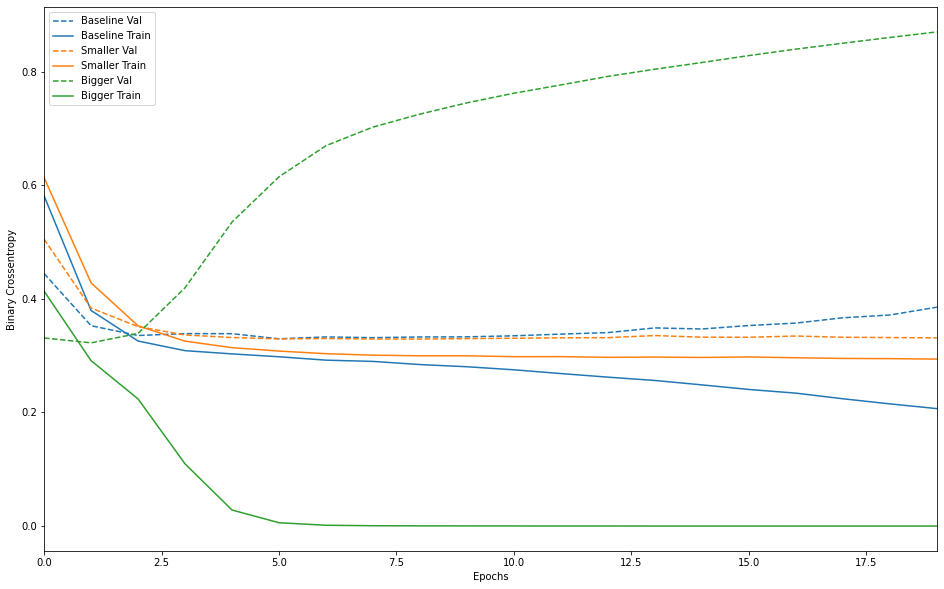

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_' + key],
                   '--', label=name.title() + ' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title() + ' Train')
  
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_', ' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data = (test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6161 - accuracy: 0.7159 - binary_crossentropy: 0.5708 - val_loss: 0.4727 - val_accuracy: 0.8213 - val_binary_crossentropy: 0.4288
Epoch 2/20
49/49 - 0s - loss: 0.4100 - accuracy: 0.8483 - binary_crossentropy: 0.3664 - val_loss: 0.3889 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.3459
Epoch 3/20
49/49 - 0s - loss: 0.3646 - accuracy: 0.8668 - binary_crossentropy: 0.3224 - val_loss: 0.3718 - val_accuracy: 0.8619 - val_binary_crossentropy: 0.3306
Epoch 4/20
49/49 - 0s - loss: 0.3495 - accuracy: 0.8720 - binary_crossentropy: 0.3092 - val_loss: 0.3674 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3282
Epoch 5/20
49/49 - 0s - loss: 0.3432 - accuracy: 0.8743 - binary_crossentropy: 0.3048 - val_loss: 0.3656 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3281
Epoch 6/20
49/49 - 0s - loss: 0.3404 - accuracy: 0.8745 - binary_crossentropy: 0.3037 - val_loss: 0.3635 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3276
Epoch 7/20
49/49 - 0s - loss

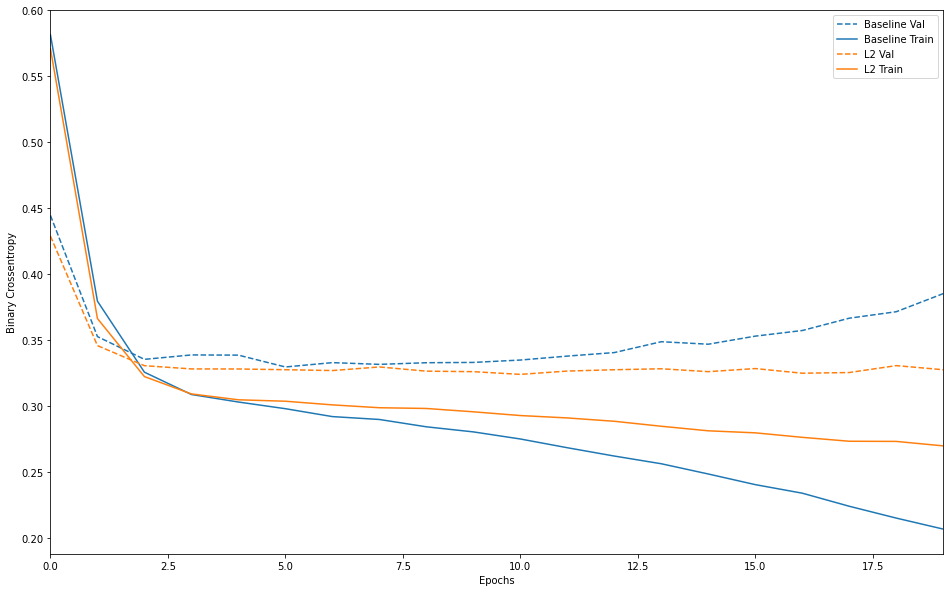

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6861 - accuracy: 0.5500 - binary_crossentropy: 0.6861 - val_loss: 0.6489 - val_accuracy: 0.7017 - val_binary_crossentropy: 0.6489
Epoch 2/20
49/49 - 0s - loss: 0.6204 - accuracy: 0.6553 - binary_crossentropy: 0.6204 - val_loss: 0.5269 - val_accuracy: 0.8090 - val_binary_crossentropy: 0.5269
Epoch 3/20
49/49 - 0s - loss: 0.5314 - accuracy: 0.7460 - binary_crossentropy: 0.5314 - val_loss: 0.4185 - val_accuracy: 0.8412 - val_binary_crossentropy: 0.4185
Epoch 4/20
49/49 - 0s - loss: 0.4588 - accuracy: 0.8010 - binary_crossentropy: 0.4588 - val_loss: 0.3631 - val_accuracy: 0.8496 - val_binary_crossentropy: 0.3631
Epoch 5/20
49/49 - 0s - loss: 0.4129 - accuracy: 0.8285 - binary_crossentropy: 0.4129 - val_loss: 0.3439 - val_accuracy: 0.8552 - val_binary_crossentropy: 0.3439
Epoch 6/20
49/49 - 0s - loss: 0.3856 - accuracy: 0.8449 - binary_crossentropy: 0.3856 - val_loss: 0.3328 - val_accuracy: 0.8567 - val_binary_crossentropy: 0.3328
Epoch 7/20
49/49 - 0s - loss

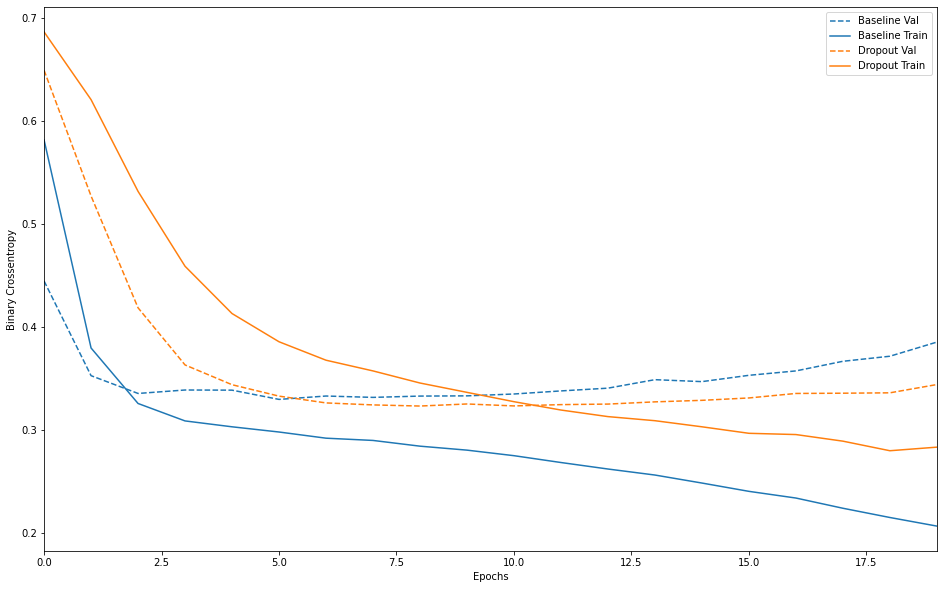

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])